In [1]:
#-------------------------------
#AlexNet Demonstration
#-------------------------------
#Import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
#--------------------------------------------------
#Load data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


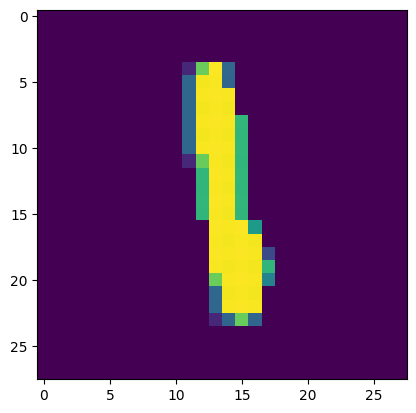

Label for the element 200 : 1
(60000, 784)
(10000, 784)


In [2]:
element = 200
plt.imshow(x_train[element])
plt.show()
print("Label for the element", element,":", y_train[element])
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 784))
print(x_train.shape)
print(x_test.shape)
x_train = x_train / 255
x_test = x_test / 255
#-----------------------------------------------------------------------

In [3]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
#-----------------------------------------------------------------------

In [4]:
# creating model
model = Sequential()  
# 1st Convolutional Layer 
model.add(Conv2D(filters = 96, input_shape = (60000,784, 3),kernel_size = (11, 11), strides = (4, 4), padding = 'valid')) 
model.add(Activation('relu')) 
# Max-Pooling  
model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2), padding = 'valid')) 
# Batch Normalisation 
model.add(BatchNormalization())

/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 2nd Convolutional Layer 
model.add(Conv2D(filters = 256, kernel_size = (3, 3),strides = (1, 1), padding = 'valid')) 
model.add(Activation('relu')) 
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),padding = 'valid')) 
# Batch Normalisation 
model.add(BatchNormalization()) 

In [6]:
# 3rd Convolutional Layer 
model.add(Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1), padding = 'valid')) 
model.add(Activation('relu')) 
# Batch Normalisation 
model.add(BatchNormalization())

In [7]:
# 4th Convolutional Layer 
model.add(Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1), padding = 'valid')) 
model.add(Activation('relu')) 
# Batch Normalisation 
model.add(BatchNormalization()) 

In [8]:
# 5th Convolutional Layer 
model.add(Conv2D(filters = 256, kernel_size = (3, 3),strides = (1, 1), padding = 'valid')) 
model.add(Activation('relu')) 
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid')) 
# Batch Normalisation 
model.add(BatchNormalization()) 

In [9]:
# Flattening 
model.add(Flatten()) 

In [ ]:
# 1st Dense Layer 
model.add(Dense(4096, input_shape = (224*224*3, ))) 
model.add(Activation('relu')) 
# Add Dropout to prevent overfitting 
model.add(Dropout(0.4)) 
# Batch Normalisation 
model.add(BatchNormalization()) 

/Users/sukhmanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 2nd Dense Layer 
model.add(Dense(4096)) 
model.add(Activation('relu')) 
# Add Dropout 
model.add(Dropout(0.4)) 
# Batch Normalisation 
model.add(BatchNormalization()) 

In [ ]:
# Output Softmax Layer 
model.add(Dense(10)) 
model.add(Activation('softmax'))
#-----------------------------------------------------------------------

In [ ]:
# compile the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
y=to_categorical(y_train)
#-----------------------------------------------------------------------

In [ ]:
# Fit the model
model.fit(x=x_train,y=to_categorical(y_train),epochs=10,batch_size=64,shuffle=True)
#-----------------------------------------------------------------------

In [ ]:
# Evaluate the model
eval = model.evaluate(x_test, to_categorical(y_test))
print('eval')
#-----------------------------------------------------------------------

In [ ]:
# Predictions
predictions = model.predict(x_test[0:100])
predictions[0]
np.argmax(predictions[0])
plt.imshow(x_test[0].reshape(28,28))